### Load data
Load players / cheaters CSVs and print basic row counts.

**Note - Reproducibility / Data:**  
This notebook runs on an full dataset by default (`USE_ANON = False`).  
The anonymized sample (`anon_players.csv`, `anon_cheaters.csv`) is included in this repository for demonstration and reproducibility. The original full dataset (used during the analysis) is not included in this repository.  
To reproduce the analysis using the public anonymized sample, set `USE_ANON = True` and ensure you have `data/anon_players.csv` and `data/anon_cheaters.csv` in the `data/` folder.


In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

# Toggle: set True for public repo notebooks (use anonymized sample),
# set False locally if you have the full dataset files.
USE_ANON = False
if USE_ANON:
    path_players = 'data/anon_players.csv'
    path_cheaters = 'data/anon_cheaters.csv'
else:
    path_players = 'data/players.csv'
    path_cheaters = 'data/cheaters.csv'

df_players = pd.read_csv(path_players)
df_cheaters = pd.read_csv(path_cheaters)

print(f'{len(df_players)} rows in {path_players}')
print(f'{len(df_cheaters)} rows in {path_cheaters}')

137334 rows in data/players.csv
15395 rows in data/cheaters.csv


### Remove duplicates
Drop rows with dublicated `id` in each file and report how many were removed.

In [2]:
player_dups = df_players.duplicated(subset="id").sum()
print(f'Removing {player_dups} duplicates from {path_players}')
df_players = df_players.drop_duplicates(subset='id')
cheater_dups = df_cheaters.duplicated(subset="id").sum()
print(f'Removing {cheater_dups} duplicates from {path_cheaters}')
df_cheaters = df_cheaters.drop_duplicates(subset='id')

# show new sizes
print(f'After dedup: {len(df_players)} players, {len(df_cheaters)} cheaters')

Removing 0 duplicates from data/players.csv
Removing 25 duplicates from data/cheaters.csv
After dedup: 137334 players, 15370 cheaters


### Remove cheaters from players list
Ensure that players dataset does not contain any IDs present in cheaters dataset.

In [3]:
overlap_mask = df_players['id'].isin(df_cheaters['id'])
remove_count = overlap_mask.sum()
print(f'Removing {remove_count} overlapping IDs (present in cheaters) from players dataset')

df_players = df_players[~overlap_mask]
print(f'Players after removing overlaps: {len(df_players)}')


Removing 149 overlapping IDs (present in cheaters) from players dataset
Players after removing overlaps: 137185


### Add label column and combine datasets
Add `cheater` label and concat into a single DataFrame.

In [4]:
df_cheaters['cheater'] = 1
df_players['cheater'] = 0
df = pd.concat([df_players, df_cheaters])
print(f'Combined dataset rows: {len(df)}')
display(df.describe().T)

Combined dataset rows: 152555


,count,mean,std,min,25%,50%,75%,max
id,152555.00,452251380443.85,499818987764.28,641109.00,936107966.50,1856652346.00,1005411821111.50,1027561452169.00
rank,152555.00,707.10,256027.47,0.00,11.00,36.00,88.00,100000000.00
scorePerMinute,152555.00,162771.87,63181430.10,0.00,285.00,446.00,674.00,24677574343.00
killsPerMinute,152555.00,3.72,1182.69,0.00,0.38,0.55,0.76,461900.85
winPercent,152555.00,46.09,16.86,0.00,42.86,47.88,52.75,100.00
killDeath,152555.00,1.08,2.68,0.00,0.64,0.90,1.23,530.90
quits,152555.00,38.59,32.27,-6879.17,25.20,35.71,49.15,100.00
accuracy,152555.00,10.52,4.89,-23.27,7.68,10.20,12.94,175.00
headshots,152555.00,17.64,9.73,0.00,13.53,16.77,20.26,100.00
secondsPlayed,152555.00,1092413.46,5827406.73,0.00,33448.00,164451.00,702303.50,1950450048.00


### Define sensible limits and mark anomalies
Many columns have extreme min/max values. For example: -6179.17% of quits, -23.27% of accuracy, 100000000th rank (which is impossible to get), etc. We use a `limits` dict with (min, max). Rather than blindly dropping all outliers, log them to a separate DataFrame `df_anomalies`.

In [5]:
limits = { # column: (min, max)
    'rank': (0, 140),
    'scorePerMinute': (0, 3000),
    'killsPerMinute': (0.0, 5.0),
    'winPercent': (0.0, 100.0),
    'killDeath': (0.0, 10.0),
    'quits': (0.0, 100.0),
    'accuracy': (0.0, 100.0),
    'headshots': (0.0, 100.0),
    'secondsPlayed': (0, 3600 * 6000),
    'kills': (0, 200_000),
    'deaths': (0, 200_000),
    'wins': (0, 20_000),
    'loses': (0, 20_000),
    'avengerKills': (0, 100_000),
    'saviorKills': (0, 100_000),
    'headShots': (0, 100_000),
    'heals': (0, 100_000),
    'revives': (0, 100_000),
    'repairs': (0, 100_000),
    'resupplies': (0, 100_000),
    'killAssists': (0, 100_000),
    'skill': (0, 1000),
    'longestHeadShot': (0.0, 1500.0),
    'highestKillStreak': (0, 150)
}
# remove rows with <l_bound or >u_bound
df_anomalies = pd.DataFrame()
for col, (lbound, ubound) in limits.items():
    if col in df.columns:
        mask = (df[col].notna()) & ((df[col] < lbound) | (df[col] > ubound))
        df_anomalies = pd.concat([df[mask], df_anomalies], ignore_index=True)
        df = df[~mask]
print(f'Total rows flagged as anomalies (any column): {len(df_anomalies)}')
print(f'Rows remaining in cleaned dataset: {len(df)}')
print(f'Missing values in cleaned dataset: {df.isna().sum().sum()}')
df.to_csv('data/clean_players.csv', index=False)

Total rows flagged as anomalies (any column): 4590
Rows remaining in cleaned dataset: 147965
Missing values in cleaned dataset: 0


### Visualize cleanup summary
Create a pie chart summarizing how many rows were removed at each stage:
- duplicates (in both players and cheaters),
- overlapping IDs (players that were also cheaters),
- anomalies (out-of-range values),
- and remaining clean dataset size.

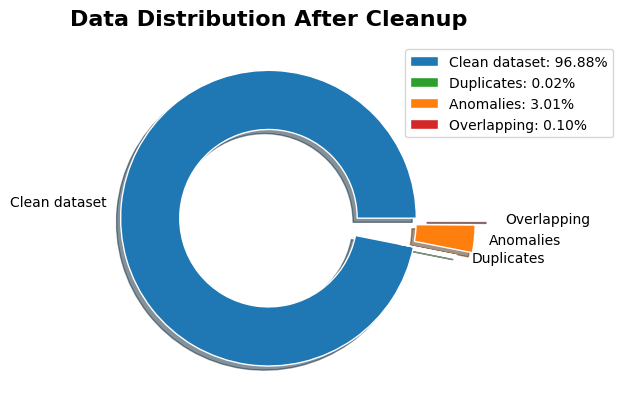

In [6]:
import matplotlib.pyplot as plt
pie_data = {
    'Clean dataset': len(df),
    'Duplicates': player_dups + cheater_dups,
    'Anomalies': len(df_anomalies),
    'Overlapping': remove_count,
    }
total = sum(pie_data.values())
labels = [f'{key}: {value/total*100:.2f}%' for key, value in pie_data.items()]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
explode = [0, 0.3, 0.4, 0.5]

fig, ax = plt.subplots()
ax.pie(x=pie_data.values(), labels=pie_data.keys(), explode=explode, colors = colors,shadow=True,wedgeprops=dict(width=0.4, edgecolor='w'))

plt.title('Data Distribution After Cleanup', fontsize=16, fontweight='bold')
plt.legend(labels = labels, bbox_to_anchor=(0.85,0.7))
plt.savefig('media/02_distripution.png')
plt.show()